In [1]:
import random
from scipy.io import loadmat
import numpy as np
import math
from matplotlib import pyplot as plt
import random
from mnist import MNIST
import copy

In [2]:
def lire_alpha_digit(donnees,liste_carac):
    matrix=[]
    count=0
    for k in range(len(liste_carac)):
        if liste_carac[k].isdigit():
            for i in range(len(donnees[int(liste_carac[k])])):
                donnees[int(liste_carac[k])][i] = np.expand_dims(donnees[int(liste_carac[k])][i].flatten(), axis=0)
            for j in range(len(np.concatenate(donnees[int(liste_carac[k])], axis=0))):
                matrix.append(np.concatenate(donnees[int(liste_carac[k])], axis=0)[j])
                
        if liste_carac[k].isalpha():
            for i in range(len(donnees[ord(liste_carac[k])-87])):
                donnees[ord(liste_carac[k])-87][i] = np.expand_dims(donnees[ord(liste_carac[k])-87][i].flatten(), axis=0)
            for j in range(len(np.concatenate(donnees[ord(liste_carac[k])-87], axis=0))):
                matrix.append(np.concatenate(donnees[ord(liste_carac[k])-87], axis=0)[j])
                
    return np.array(matrix) #Vérifiée

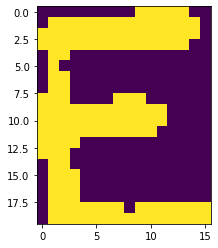

In [3]:
a=loadmat("C:/Users/jaber/Downloads/binaryalphadigs.mat")['dat']
b=lire_alpha_digit(a,"e")
plt.imshow(b[30,:].reshape(20,16))

In [4]:
def init_RBM(p,q):
    class RBM:
        W = np.random.normal(loc=0,scale=0.1 ,size=[p,q])
        a = np.zeros([1,p])
        b = np.zeros([1,q])
    r = RBM()
    return r#Vérifiée

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))#Vérifiée

In [6]:
def entree_sortie_RBM(RBM, donnees_entree):
    #print(RBM.b.shape," ",np.dot(donnees_entree,RBM.W).shape)
    donnees_sortie=sigmoid(RBM.b+np.dot(donnees_entree,RBM.W))
    #print("fc ",donnees_entree,"  ", RBM.W)
    return donnees_sortie    #Vérifiée

In [7]:
def sortie_entree_RBM(RBM, donnees_sortie):
    donnees_entree= sigmoid(RBM.a +np.dot(donnees_sortie,np.transpose(RBM.W)))
    return donnees_entree #Vérifiée

In [8]:
def train_RBM(RBM,nb_iter,alpha,batch_size,donnee_entree):
    n=len(donnee_entree)
    p=RBM.W.shape[0]
    q=RBM.W.shape[1]
    rmse_list = []
    for i in range(nb_iter):
        x=donnee_entree
        for batch in range(1,n,batch_size):
            #print(n," ",min(n,batch_size+batch-1)," ",batch)
            v0=x[batch:min(n,batch_size+batch-1),:]
            p_h_v0=entree_sortie_RBM(RBM,v0)
          
            h0=1*(np.random.rand(v0.shape[0],q) <= p_h_v0)
                  
            p_v_h0=sortie_entree_RBM(RBM,h0)
                  
            v1= 1*(np.random.rand(v0.shape[0],p) <= p_v_h0)
            p_h_v1=entree_sortie_RBM(RBM,v1)
                  
            da= v0.sum(axis=0) - v1.sum(axis=0)
            db = p_h_v0.sum(axis=0) - p_h_v1.sum(axis=0)
            dw = np.dot(np.transpose(v0),p_h_v0) - np.dot(np.transpose(v1),p_h_v1)
                  
            RBM.W += (alpha/len(v0))*dw
            RBM.a += (alpha/len(v0))*da
            RBM.b += (alpha/len(v0))*db
                  
      
        h = entree_sortie_RBM(RBM,x)
        V_construit= sortie_entree_RBM(RBM,h)
        erreur = (x - V_construit)**2
        rmse = math.sqrt(np.sum(erreur)/np.size(erreur))
        #print('Iteration n° : ',i)
        #print('RMSE : ',rmse)
        rmse_list.append(rmse)
        
    plt.title("Évolution de la racine de l'erreur quadratique moyenne en fonction du nombre d'itérations")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Racine de l'erreur quadratique moyenne")
    plt.plot(list(range(nb_iter)),rmse_list)
    plt.show()
    
        
    return (RBM) #Vérifiée

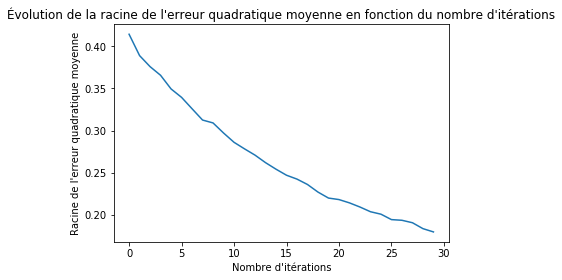

In [9]:
RBM0 = init_RBM(320,200)
a=loadmat("C:/Users/jaber/Downloads/binaryalphadigs.mat")['dat']
b=lire_alpha_digit(a,"e")
RBM_T=train_RBM(RBM0,30,0.1,8,b)

In [10]:
def generer_image_RBM(RBM,nb_iter,nb_image):
    
    p=RBM.W.shape[0]
    q=RBM.W.shape[1]
    
    # Initialisation aléatoire d'images
    V0 = 1*(np.random.rand(nb_image,320)<= 0.5)
    
    for i in range(nb_iter):
        
        p_h_v0 = entree_sortie_RBM(RBM,V0)
    
        H0 = 1*(np.random.rand(nb_image,q) <= p_h_v0)
        p_v_h0 = sortie_entree_RBM(RBM,H0)
    
        V1 = 1*(np.random.rand(nb_image,p) <= p_v_h0)
    
        V0 = V1
    
    # Affichage des images
    for i in range(nb_image):
        image = np.reshape(V0[i],(20, 16))
        plt.imshow(image)
        plt.show()
    
    return(V0)

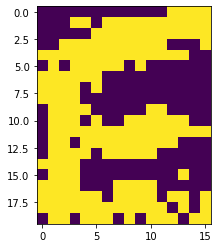

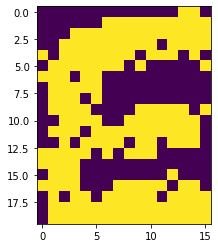

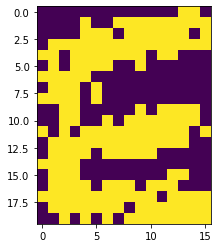

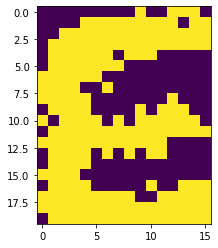

In [11]:
simulation_images_RBM = generer_image_RBM(RBM_T,80,4)

In [12]:
def init_DNN(taille):  
    w=[]
    b=[]
    for i in range(len(taille)-1):
        #print(i)
        w.append(np.random.normal(0,0.1,[taille[i],taille[i+1]]))
       # print(w)
        b.append(np.zeros([1,taille[i]]))
    b.append(np.zeros([1,taille[len(taille)-1]]))
    class DNN:
        W=w
        B=b
    d = DNN()
    return d

In [13]:
def train_DBN(DNN,nb_iter,alpha,batch_size,donnee_entree):
    L=len(DNN.W)
    for i in range(L-1):
        p=DNN.W[i].shape[0]
        q=DNN.W[i].shape[1]
        RBM=init_RBM(p,q)
        if (i==0):
            H = donnee_entree
            RBM1 = train_RBM(RBM,nb_iter,alpha,batch_size,H);
            DNN.W[i] = RBM1.W
            DNN.B[i] = RBM1.a
            DNN.B[i+1] = RBM1.b
            H = entree_sortie_RBM(RBM,H)
        else:
          RBM.W = DNN.W[i]
          RBM.a = DNN.B[i]
          RBM1 = train_RBM(RBM,nb_iter,alpha,batch_size,H)
          DNN.W[i] = RBM1.W
          DNN.B[i+1] = RBM1.b
          H = entree_sortie_RBM(RBM,H)
    return DNN

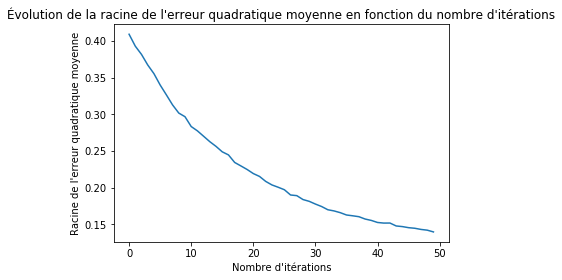

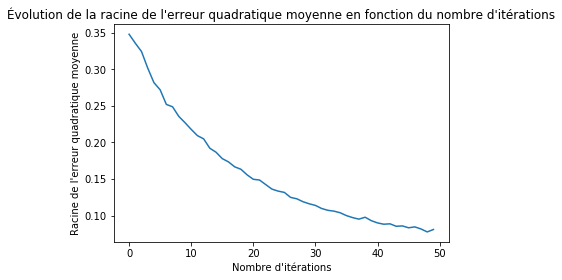

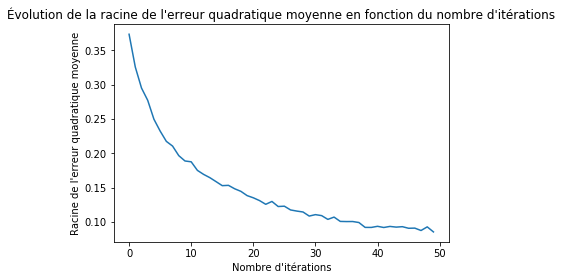

In [14]:
dnn0 = init_DNN([320,200,200,300,200])
dnn_trained = train_DBN(dnn0,50,0.1,8,b)

In [15]:
def generer_image_DBN(DNN,nb_iter,nb_image):
    p = DNN.B[0].shape[0]
    q = DNN.B[-1].shape[1]
    #print("q= ",q)
    # Initialisation aléatoire d'images
    V0 = 1*(np.random.rand(nb_image,320)<= 0.5)
    L = len(DNN.W)  
    for i in range(nb_iter):  
        for j in range(L):
            (p1,q1) = DNN.W[j].shape
            RBM = init_RBM(p1,q1)
            RBM.W = DNN.W[j]
            RBM.a = DNN.B[j]
            RBM.b = DNN.B[j+1]
            V0 = entree_sortie_RBM(RBM,V0)
            #print(V0.shape," ",j," ",RBM.W.shape)
            
            
        p_h_v0 = V0
    
        H0 = 1*(np.random.rand(nb_image,q) <= p_h_v0)
        for k in range(L-1,-1,-1):
            p1= DNN.W[k].shape[0]
            q1= DNN.W[k].shape[1]
            RBM = init_RBM(p1,q1)
            RBM.W = DNN.W[k]
            RBM.a = DNN.B[k]
            RBM.b = DNN.B[k+1]
            H0 = sortie_entree_RBM(RBM,H0)
    
        p_v_h0 = H0
    
        V1 = 1*(np.random.rand(nb_image,p) <= p_v_h0)
    
        V0 = V1
  
    for i in range(nb_image):
        img = np.reshape(V0[i],(20, 16))
        plt.imshow(img)
        plt.show()
    
    return(V0)

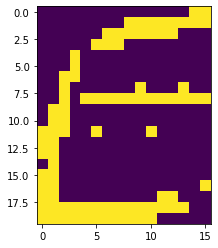

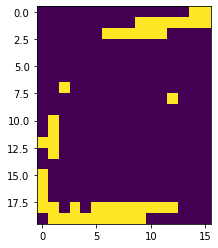

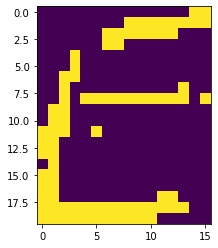

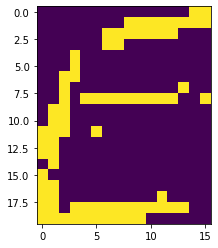

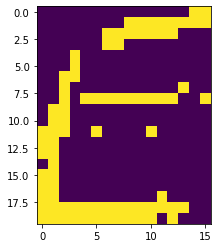

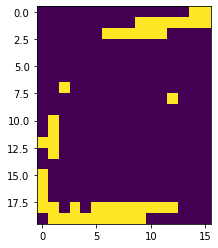

In [16]:
simulation_images_DBN = generer_image_DBN(dnn_trained,50,6)

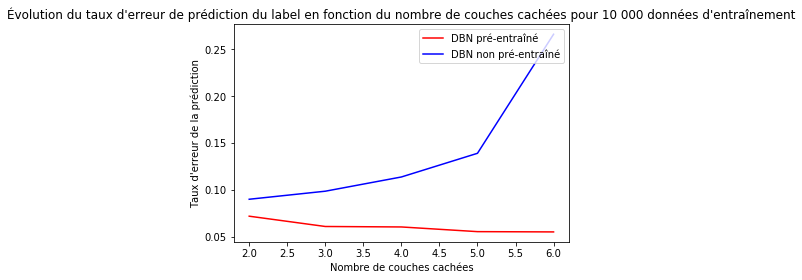

In [17]:
error_rate_1_data=[1-0.9281,1-0.9391,1-0.9396,1-0.9446,1-0.9449]
error_rate_2_data=[1-0.91,1-0.9014,1-0.8862,1-0.8609,1-0.7337]
plt.title("Évolution du taux d'erreur de prédiction du label en fonction du nombre de couches cachées pour 10 000 données d'entraînement")
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Taux d'erreur de la prédiction")
plt.plot(range(2,7),error_rate_1_data,'r',label='DBN pré-entraîné')
plt.plot(range(2,7),error_rate_2_data,'b',label='DBN non pré-entraîné')
plt.legend(loc="upper right")
plt.show()

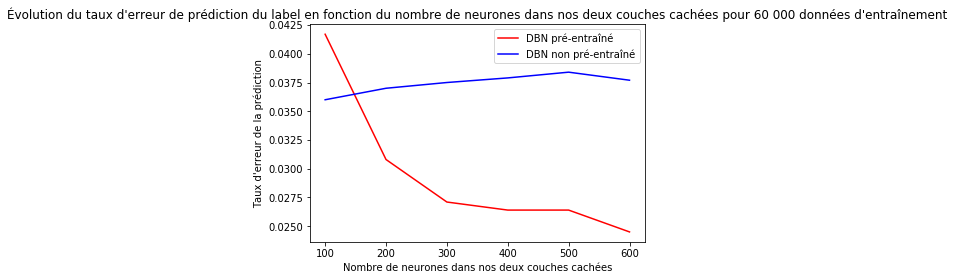

In [18]:
error_rate_1_data=[1-0.9583,1-0.9692,1-0.9729,1-0.9736,1-0.9736,1-0.9755]
error_rate_2_data=[1-0.964,1-0.963,1-0.9625,1-0.9621,1-0.9616,1-0.9623]
plt.title("Évolution du taux d'erreur de prédiction du label en fonction du nombre de neurones dans nos deux couches cachées pour 60 000 données d'entraînement")
plt.xlabel("Nombre de neurones dans nos deux couches cachées")
plt.ylabel("Taux d'erreur de la prédiction")
plt.plot(range(100,700,100),error_rate_1_data,'r',label='DBN pré-entraîné')
plt.plot(range(100,700,100),error_rate_2_data,'b',label='DBN non pré-entraîné')
plt.legend(loc="upper right")
plt.show()

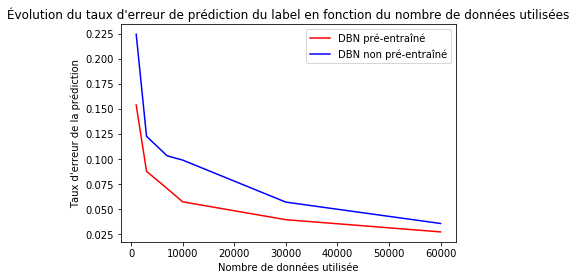

In [19]:
error_rate_1_data=[1-0.846,1-0.9121,1-0.9293,1-0.9425,1-0.9603,1-0.9725]
error_rate_2_data=[1-0.7755,1-0.8772,1-0.8967,1-0.9009,1-0.9428,1-0.9641]
Nb_data=[1000,3000,7000,10000,30000,60000]
plt.title("Évolution du taux d'erreur de prédiction du label en fonction du nombre de données utilisées")
plt.xlabel("Nombre de données utilisée")
plt.ylabel("Taux d'erreur de la prédiction")
plt.plot(Nb_data,error_rate_1_data,'r',label='DBN pré-entraîné')
plt.plot(Nb_data,error_rate_2_data,'b',label='DBN non pré-entraîné')
plt.legend(loc="upper right")
plt.show()